# Proyek Analisis Data: Bike Sharing Dataset

# Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan dari jumlah pengguna tiap tahun, apakah ada peningkatan atau penurunan?
- Faktor apa yang mempengaruhi jumlah pengguna?


# Import Semua Packages/Library yang Digunakan

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print("python ver", sys.version)
print("numpy ver", np.__version__)
print("panda ver", pd.__version__)
print("matplotlib ver", matplotlib.__version__)

python ver 3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]
numpy ver 1.26.1
panda ver 2.1.3
matplotlib ver 3.8.2


# Data Wrangling

## Gathering Data

In [2]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai Data hour_df

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan info diatas **terdapat kesalahan/perlu koreksi tipe data** pada kolom :
- dteday
- season
- weathersit
- weekday
- workingday

Lalu untuk **data yang tidak akan digunakan** ada pada kolom :
- instant
- yr
- mnth
- holiday
- atemp

In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pengecekan setiap kolom diatas, ternyata **tidak ada data yang kosong(Nan).**

In [6]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Menilai Data day_df

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan info diatas terdapat **terdapat kesalahan/perlu koreksi tipe data** pada kolom :
- dteday
- season
- yr
- mnth
- weathersit
- workingday

Lalu untuk **data yang tidak akan digunakan** ada pada kolom :
- instant
- holiday
- weekday
- atemp

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan pengecekan setiap kolom diatas, ternyata **tidak ada data yang kosong(Nan).**

In [10]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning Data

### Membersihkan Data hour_df

Merubah tipe data pada beberapa kolom

Lalu juga menghapus/drop kolom yang tidak diperlukan


In [12]:
# CONVERTING COLUMN DATA TYPE
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')

# DROP COLUMN
hour_df = hour_df.drop(["instant","yr","mnth","holiday","atemp"], axis=1)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   hr          17379 non-null  int64         
 3   weekday     17379 non-null  category      
 4   workingday  17379 non-null  category      
 5   weathersit  17379 non-null  category      
 6   temp        17379 non-null  float64       
 7   hum         17379 non-null  float64       
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  cnt         17379 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.1 MB


Mengonversi data pada kolom kategori variabel berdasarkan kriteria yang ditunjukkan pada file readme.txt

In [13]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

Merubah beberapa nama kolom agar lebih mudah dimengerti

In [14]:
hour_df.rename(columns={
    "dteday" : "date",
    "hr": "hour",
    "weathersit" : "weather",
    "temp": "temperature",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

Merubah nilai dari 'temperature', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

In [15]:
hour_df['temperature'] = hour_df['temperature']*41
hour_df['humidity'] = hour_df['humidity']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [16]:
hour_df.head()

,date,season,hour,weekday,workingday,weather,temperature,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,0,Saturday,No,Clear,9.84,81.0,0.0,3,13,16
1,2011-01-01,Winter,1,Saturday,No,Clear,9.02,80.0,0.0,8,32,40
2,2011-01-01,Winter,2,Saturday,No,Clear,9.02,80.0,0.0,5,27,32
3,2011-01-01,Winter,3,Saturday,No,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01,Winter,4,Saturday,No,Clear,9.84,75.0,0.0,0,1,1


### Membersihkan Data day_df

Merubah tipe data pada beberapa kolom

Lalu juga menghapus/drop kolom yang tidak diperlukan

In [17]:
# CONVERTING COLUMN DATA TYPE
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')

# DROP COLUMN
day_df = day_df.drop(["instant","holiday","weekday","atemp"], axis=1)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   workingday  731 non-null    category      
 5   weathersit  731 non-null    category      
 6   temp        731 non-null    float64       
 7   hum         731 non-null    float64       
 8   windspeed   731 non-null    float64       
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(3), int64(3)
memory usage: 44.6 KB


Mengonversi data pada kolom kategori variabel berdasarkan kriteria yang ditunjukkan pada file readme.txt

In [18]:
# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

Merubah beberapa nama kolom agar lebih mudah dimengerti

In [19]:
day_df.rename(columns={
    "dteday" : "date",
    "yr": "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "temp": "temperature",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

Merubah nilai dari 'temperature', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

In [20]:
day_df['temperature'] = day_df['temperature']*41
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

In [21]:
day_df.head()

,date,season,year,month,workingday,weather,temperature,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,No,Misty,14.110847,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,No,Misty,14.902598,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,Yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,Yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,Yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [22]:
hour_df.describe()

,date,hour,temperature,humidity,windspeed,casual,registered,total_count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,20.376474,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,13.940000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,20.500000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,27.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,6.914405,7.894801,19.292983,8.196795,49.305030,151.357286,181.387599


Berdasarkan tabel diatas, selama periode **2011-2012**, **per jamnya**, **jumlah pengguna sepeda dari kisaran 1 hingga 977 orang** dengan **rata-rata jumlah penggunanya 189.46 orang** dengan **standar deviasinya 181.38**

In [23]:
hour_df.groupby(by=["hour"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})

,casual,registered,total_count
hour,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


Berdasarkan tabel diatas, **pengguna rental sepeda terbanyak berada di jam 8 pagi dan jam 5-6 malam**

In [24]:
hour_df.groupby(by=["weather"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\3611268968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["weather"]).agg({


,casual,registered,total_count
weather,,,
Clear,462745,1875428,2338173
Misty,134481,661471,795952
Light_RainSnow,22783,135548,158331
Heavy_RainSnow,8,215,223


Berdasarkan tabel diatas, **pengguna lebih memilih untuk bersepeda pada saat cuaca: Clear, Few clouds, Partly cloudy, Partly cloudy**

dan **sangat sedikit sekali pengguna pada saat cuaca : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**

### Explore Data day_df


In [25]:
day_df.describe()

,date,temperature,humidity,windspeed,casual,registered,total_count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,20.310776,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,13.820424,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,20.431653,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,26.872076,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,7.505091,14.242910,5.192357,686.622488,1560.256377,1937.211452


Berdasarkan table diatas, **per harinya**, **jumlah pengguna dari rental sepeda dari kisaran 22 hingga 8714** orang dengan **rata-rata jumlah pengguna 4504 orang** dengan **standar deviasinya 1937.21**



In [26]:
day_df.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\360472028.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["year", "month"]).agg({


casual  registered  total_count
year month                                 
2011 Jan      3073       35116        38189
     Feb      6242       41973        48215
     Mar     12826       51219        64045
     Apr     22346       72524        94870
     May     31050      104771       135821
     Jun     30612      112900       143512
     Jul     36452      104889       141341
     Aug     28842      107849       136691
     Sep     26545      100873       127418
     Oct     25222       98289       123511
     Nov     15594       86573       102167
     Dec      8448       78875        87323
2012 Jan      8969       87775        96744
     Feb      8721       94416       103137
     Mar     31618      133257       164875
     Apr     38456      135768       174224
     May     44235      151630       195865
     Jun     43294      159536       202830
     Jul     41705      161902       203607
     Aug     43197      171306       214503
     Sep     43778      174795       218573
     Oct     34538      164303       198841
     Nov     21009      131655       152664
     Dec     13245      110468       123713

Berdasarkan table diatas, bisa dikatakan bahwa **untuk setiap tahunnya** pada **periode Bulan Januari sampai Februari** adalah **waktu dimana jumlah pengguna paling sedikit dibanding bulan lain**

In [27]:
day_df.groupby(by=["weather"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\574440511.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["weather"]).agg({


,casual,registered,total_count
weather,,,
Clear,446346,1811606,2257952
Misty,169776,827082,996858
Light_RainSnow,3895,33974,37869


Berdasarkan tabel diatas, seperti sebelumnya pada tabel dari data "hour_df", untuk data dari "day_df" juga memiliki **pengguna yang lebih memilih untuk bersepeda pada saat cuaca : Clear, Few clouds, Partly cloudy, Partly cloudy**

In [28]:
day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\4106936463.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=["season"]).agg({


,casual,registered,total_count
season,,,
Winter,60622,410726,471348
Spring,203522,715067,918589
Summer,226091,835038,1061129
Fall,129782,711831,841613


Berdasarkan tabel diatas, untuk setiap tahunnya, **musim yang memiliki jumlah pengguna terbanyak adalah gugur(fall)**

dan terjadi **penurunan jumlah pengguna yang signifikan pada musim semi(springer)**

# Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan dari jumlah pengguna tiap tahun, apakah ada peningkatan atau penurunan?

Pertama kita membuat **data frame** untuk **tahun 2011** berdasarkan data pada **data day_df**

In [29]:
day_2011_df = day_df.loc[ (day_df['date'].dt.year == 2011) ].copy()

Kode dibawah membuat data dari **jumlah total pengguna** berdasarkan **kolom 'date'** yang telah **di-convert** untuk menjadi **bulan** saja

In [30]:
monthly_2011_df = day_2011_df.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})
monthly_2011_df.index = monthly_2011_df.index.strftime('%B')
monthly_2011_df = monthly_2011_df.reset_index()

Kode dibawah membuat visual datanya menggunakan **Line Chart**

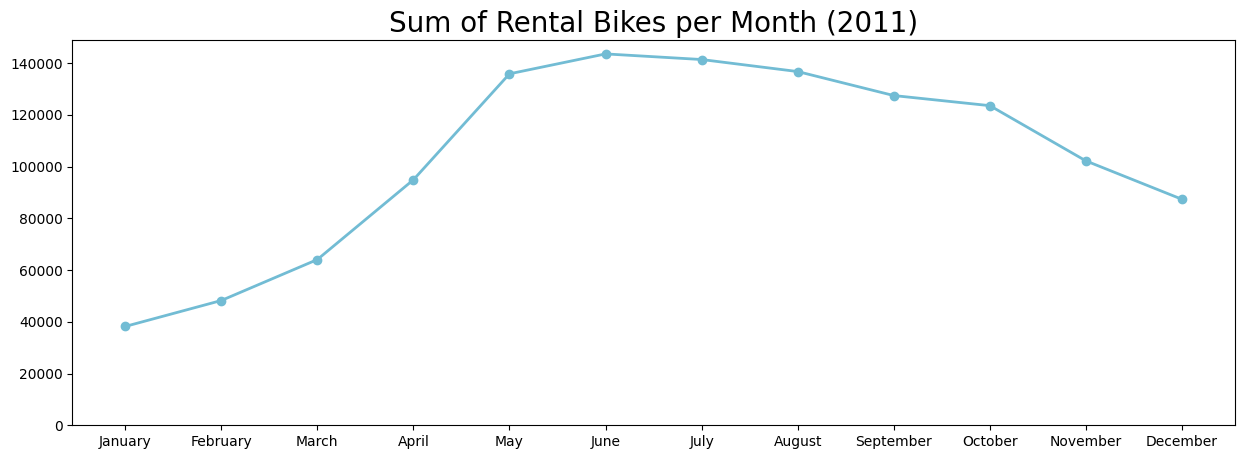

In [31]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_2011_df["date"], monthly_2011_df["total_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Sum of Rental Bikes per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(ymin=0)
plt.show()

Kedua kita membuat **data frame** untuk **tahun 2012** berdasarkan data pada **data day_df**

In [32]:
day_2012_df = day_df.loc[ (day_df['date'].dt.year == 2012) ].copy()
day_2012_df = day_2012_df.reset_index()

Kode dibawah membuat data dari **jumlah total pengguna** berdasarkan **kolom 'date'** yang telah **di-convert** untuk menjadi **bulan** saja

In [33]:
monthly_2012_df = day_2012_df.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})
monthly_2012_df.index = monthly_2012_df.index.strftime('%B')
monthly_2012_df = monthly_2012_df.reset_index()
# monthly_2012_df

Kode dibawah membuat visual datanya menggunakan **Line Chart**

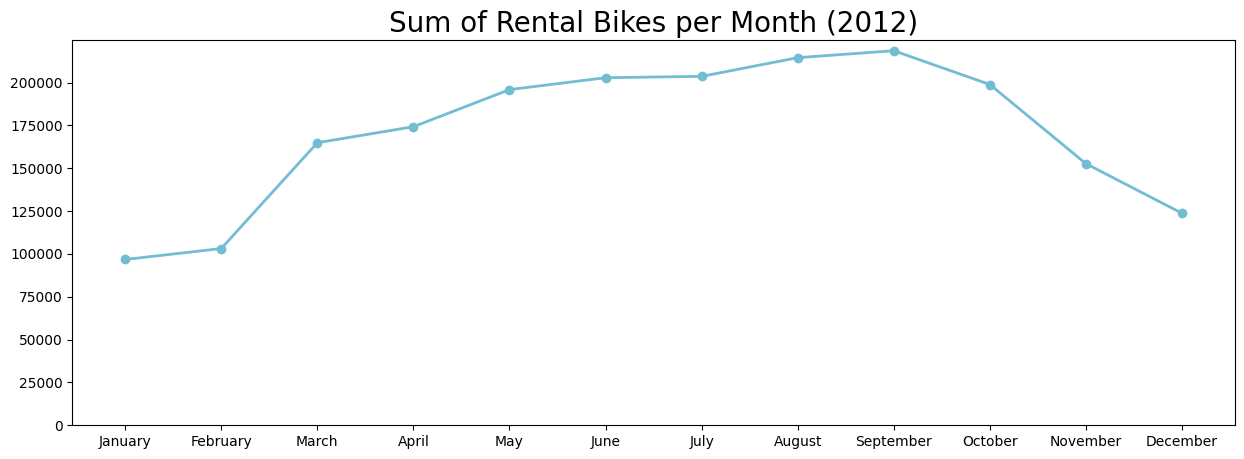

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_2012_df["date"], monthly_2012_df["total_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Sum of Rental Bikes per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(ymin=0)
plt.show()

### Pertanyaan 2: Faktor apa yang mempengaruhi jumlah pengguna?

**1. Pengaruh Jam pada total pengguna**

Kode dibawah membuat data dari **jumlah total pengguna** berdasarkan **kolom 'hour'** pada **data hour_df**

In [35]:
hour_count_df = hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})
hour_count_df = hour_count_df.reset_index()

Kode dibawah membuat visual datanya menggunakan **Bar Chart**

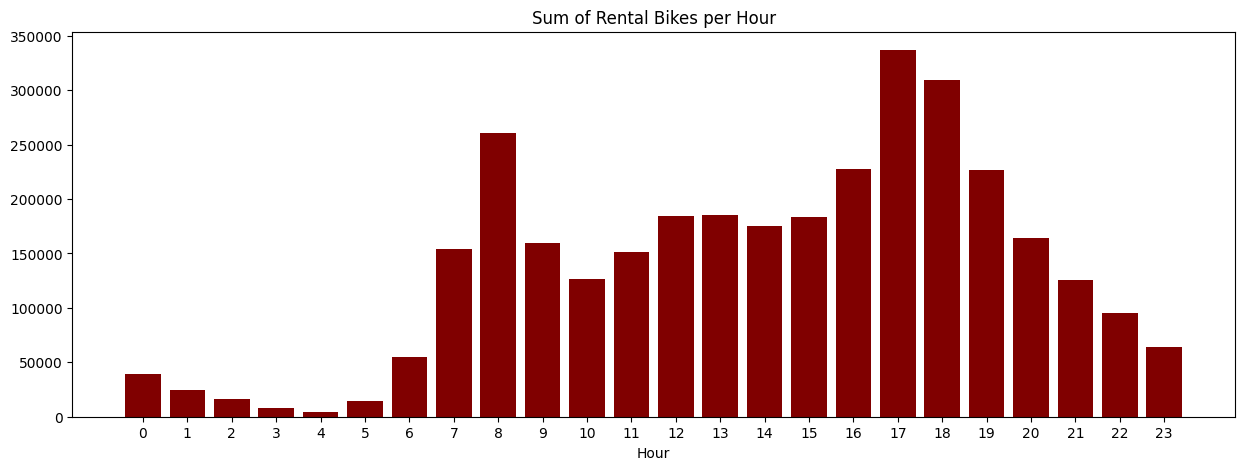

In [36]:
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(hour_count_df['hour'], hour_count_df['total_count'], color ='maroon',
        width = 0.8)
plt.xticks(hour_count_df['hour'])
plt.xlabel("Hour")
plt.title("Sum of Rental Bikes per Hour")
plt.show()

**2. Pengaruh Seasons (Musim)**

Kode dibawah membuat data dari **jumlah total pengguna** berdasarkan **kolom 'season'** pada **data day_df**

In [37]:
season_df = day_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})
season_df = season_df.reset_index()
# season_df

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\812860393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_df = day_df.groupby(by=["season"]).agg({


Kode dibawah membuat visual datanya menggunakan **Bar Chart**

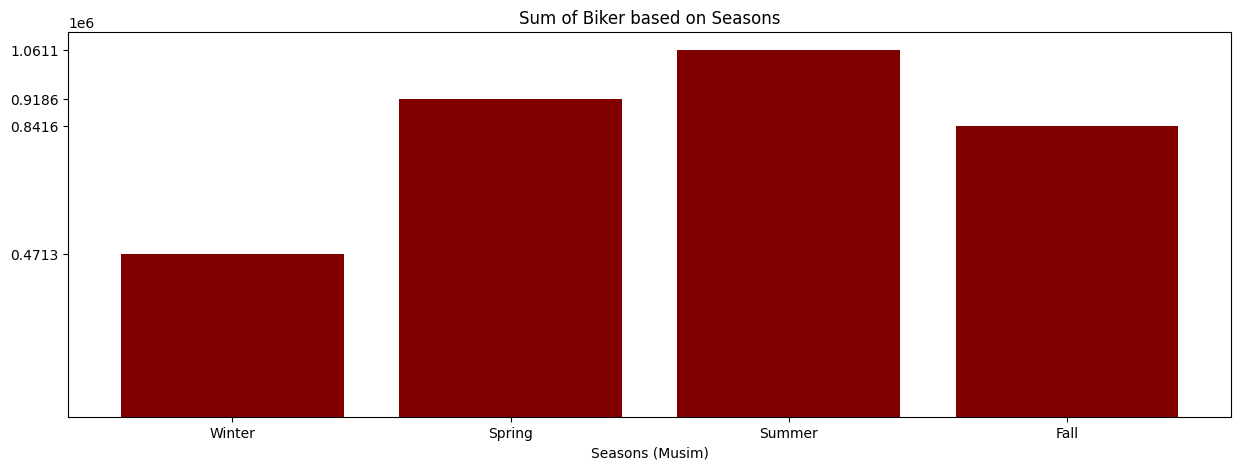

In [38]:
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(season_df['season'], season_df['total_count'], color ='maroon',
        width = 0.8)
plt.xticks(season_df['season'])
plt.yticks(season_df['total_count'])
plt.xlabel("Seasons (Musim)")
plt.title("Sum of Biker based on Seasons")
plt.show()

**3. Pengaruh Weather (Cuaca)**

Kode dibawah membuat data dari **jumlah total pengguna** berdasarkan **kolom 'musim'** pada **data day_df**


In [39]:
weather_df = day_df.groupby(by=["weather"]).agg({
    "casual": "sum",
    "registered": "sum",
    "total_count": "sum"
})
weather_df = weather_df.reset_index()
# weather_df

C:\Users\User PC\AppData\Local\Temp\ipykernel_27484\191673464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_df = day_df.groupby(by=["weather"]).agg({


Kode dibawah membuat visual datanya menggunakan **Bar Chart**

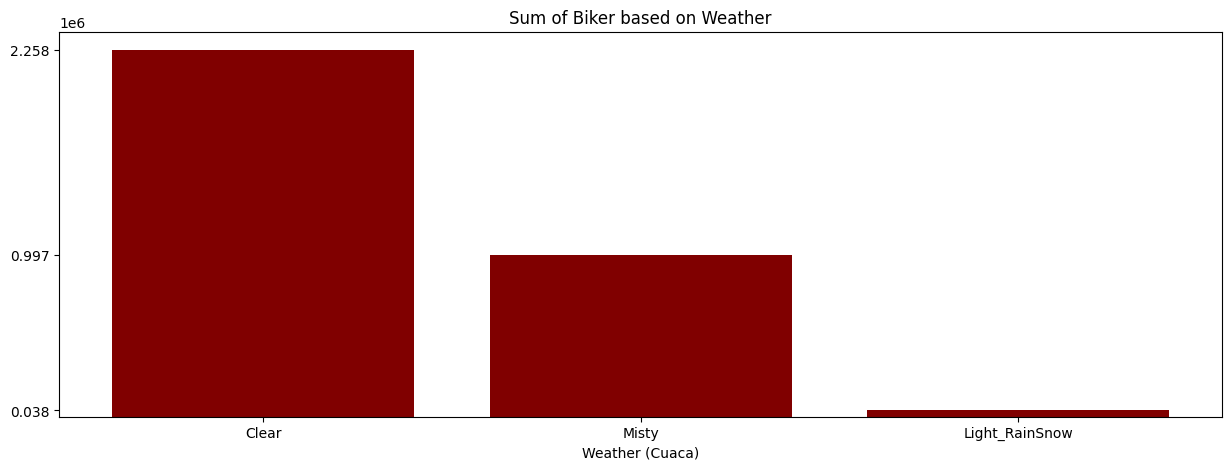

In [40]:
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
plt.bar(weather_df['weather'], weather_df['total_count'], color ='maroon',
        width = 0.8)
plt.xticks(weather_df['weather'])
plt.yticks(weather_df['total_count'])
plt.xlabel("Weather (Cuaca)")
plt.title("Sum of Biker based on Weather")
plt.show()

# Conclusion

### 1. Bagaimana perkembangan dari jumlah pengguna tiap tahun, apakah ada peningkatan atau penurunan?

Berdasarkan visual data, bisa dikatakan bahwa **dibandingkan tahun 2011, pada tahun 2012 mengalami kenaikan jumlah penguna Rental Bikes.**

- Bisa dilihat bahwa **pada tahun 2011 jumlah pengguna Rental Bikes terendah berada di kisaran 40.000an orang. Sementara untuk tahun 2012, jumlah pengguna Rental Bikes berada di kisaran 100.000an orang.**

- Bisa dilihat juga **pada tahun 2011 jumlah pengguna Rental Bikes tertinggi berada di kisaran 140.000an orang. Sementraa untuk tahun 2012, berada di kisaran 200.000 lebih orang**

### 2. Faktor apa yang mempengaruhi jumlah pengguna?

**Berikut beberapa faktor yang dapat memengaruhi jumlah pengguna :**

**1. Jam**

> Berdasarkan visual data, **Pada jam 8 Pagi dan kisaran waktu 5-6 Sore adalah waktu tertinggi** dimana biasanya para customer menggunakan **Rental Bikes**.

> Dimana **pada kisaran 0-5 Pagi adalah waktu terendah**. Ini dikarenakan waktu tersebut adalah dimana **waktu tidur/istirahat**


**2. Seasons (Musim)**

> Berdasarkan visual data, **pada saat Summer (Panas) adalah musim tertinggi untuk jumlah pengguna Rental Bikes**. Namun untuk **musim Spring (Semi) dan Fall (Gugur), jumlah penggunanya tidak terlalu jauh dari jumlah pengguna pada Summer (Panas).**

> Sementara untuk **Winter, memiliki jumlah pengguna yang sangat jauh dibandingkan dengan ketiga musim yang lain**. Hal ini bisa terjadi karena berhubungan dengan faktor selanjutnya.

**3. Weather (Cuaca)**

> Berdasarkan visual data, **mayoritas, orang-orang akan menggunakan Rental Bikes disaat cuaca Clear (Cerah).**

> Bisa dilihat untuk cuaca yang lain, memiliki jumlah pengguna **Rental Bikes** yang sangat jauh **dibandingkan saat cuaca sedang Clear (Cerah)**.

> Bahkan untuk **kategori cuaca Heavy Rainsnow sampai tidak ada sama sekali orang** yang menggunakan Rental Bikes.

